In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("PEP1.csv")

In [5]:


df.head(2)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functiol', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

In [7]:
df.shape

(1460, 81)

In [8]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
#Printing total count of Null values 
print(df.isnull().sum().sum())

6965


In [10]:
for i in df.columns:
    print (i , ":", df[i].unique())
    print (" _ "*40)
    print (" _ "*40)

Id : [   1    2    3 ... 1458 1459 1460]
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47.

In [11]:
numeric_df= df.select_dtypes(include=[np.number])

category_df=df.select_dtypes(exclude=[np.number])

In [12]:
numericcol=numeric_df.columns.tolist()
categorycol=category_df.columns.tolist()

print ("Category :",categorycol)
print ("Numeric :",numericcol)

Category : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numeric : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',

In [13]:
#For reading entire dataset
df = pd.DataFrame(df)  
    
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
#Checking the skewness of entire data
df.skew(axis = 0, skipna = True)

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [15]:
#Checking skewness and kurtosis of SalePrice
print("Skewness: %f" % df['SalePrice'].skew())

Skewness: 1.882876


In [16]:
#Code to find correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0

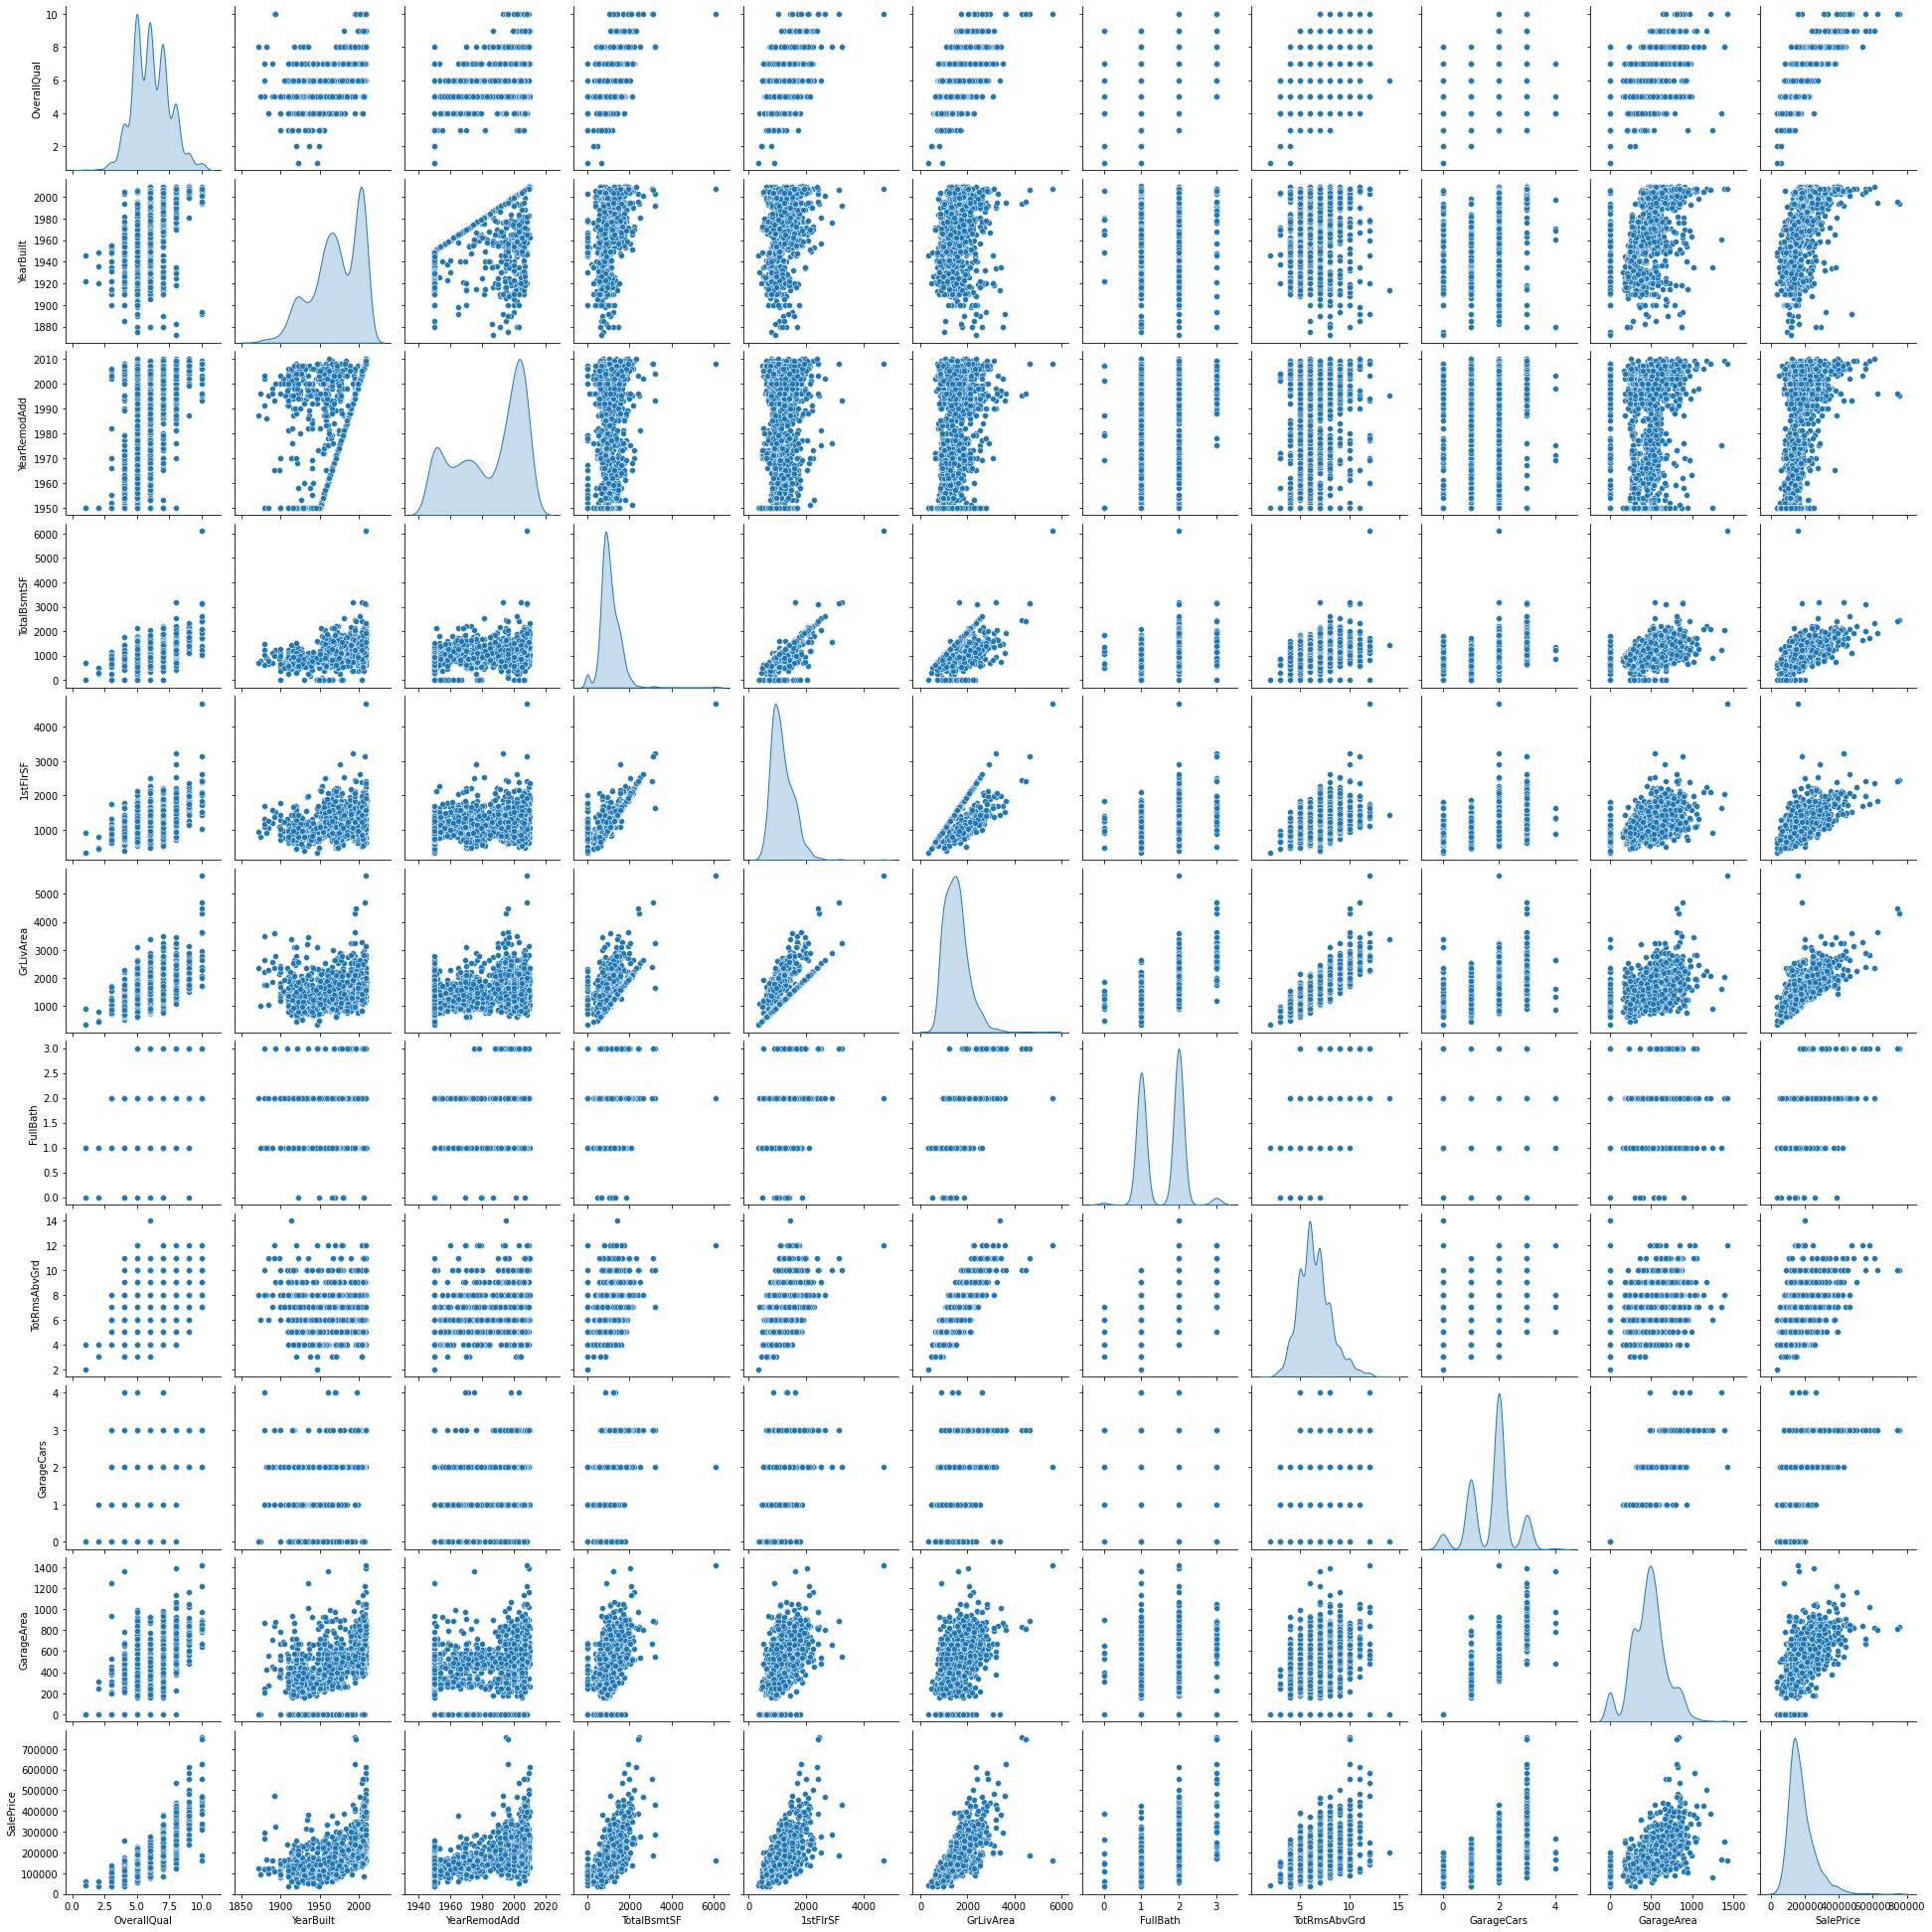

In [18]:
 IV_PP = sns.pairplot(df, vars=['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea','SalePrice'],diag_kind="kde")

In [19]:
df.select_dtypes(include = 'number')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [22]:
#Creating a dataset with significant numerical variables
# number_df = df.select_dtypes(include = 'int').copy() # this is not correct - inlcude = 'number' is correct
number_df = df.select_dtypes(include = 'number').copy()
number_df.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500


In [23]:
#Keep significant variables
number_df = number_df[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars','SalePrice']]
number_df.head(2)

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,7,2003,856,1710,2,2,208500
1,6,1976,1262,1262,2,2,181500


In [24]:
#Separating dataset for categorical variable
category_df = df.select_dtypes(include = 'object').copy()
category_df.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [25]:
#Identifying all the variables which contain missing values
category_df_stats = pd.DataFrame(columns = ['column','num_miss', 'pct_miss'])

na_data = pd.DataFrame()

for c in category_df.columns:
    na_data['column'] = [c]
    na_data['num_miss'] = category_df[c].isnull().sum()
    na_data['pct_miss'] = (category_df[c].isnull().sum()/len(category_df)).round(3)*100
    category_df_stats = category_df_stats.append(na_data)
    
category_df_stats

,column,num_miss,pct_miss
0,MSZoning,0,0.0
0,Street,0,0.0
0,Alley,1369,93.8
0,LotShape,0,0.0
0,LandContour,0,0.0
0,Utilities,0,0.0
0,LotConfig,0,0.0
0,LandSlope,0,0.0
0,Neighborhood,0,0.0
0,Condition1,0,0.0


In [26]:
#Dropping variables which contain large number of missing values
category_df = category_df.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley',],axis=1)

In [27]:
category_df.dropna(inplace=True)
category_df.isnull().sum(axis=0)

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functiol         0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [28]:
print(category_df.head(2))
print('-------------')
print(category_df.shape)

  MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functiol  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd      Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA      Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  

[2 rows x 38 columns]
-------------
(1338, 38)


In [29]:


#Adding SalePrice to the category_df
category_df['SalePrice'] = df.loc[category_df.index, 'SalePrice'].copy()
category_df.head(2)



,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functiol,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500


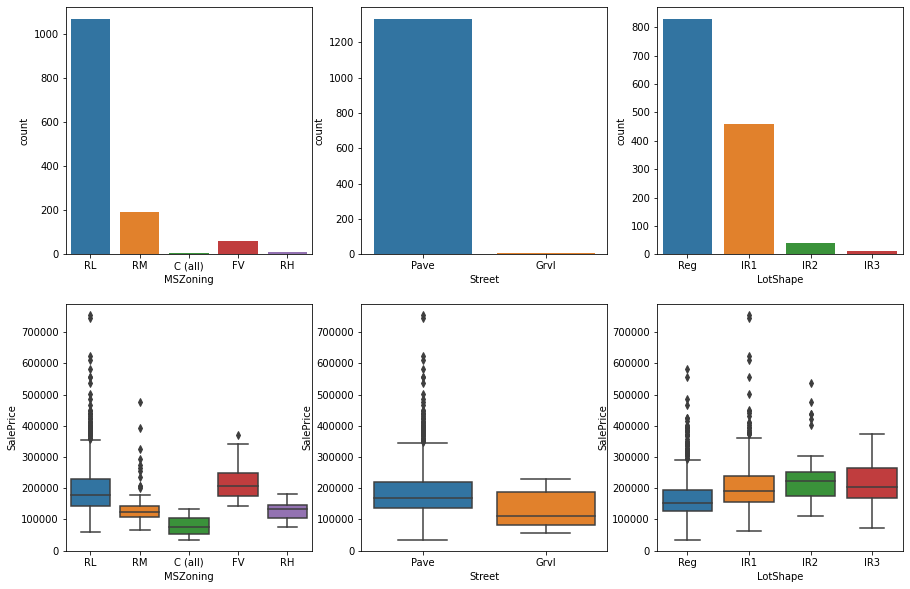

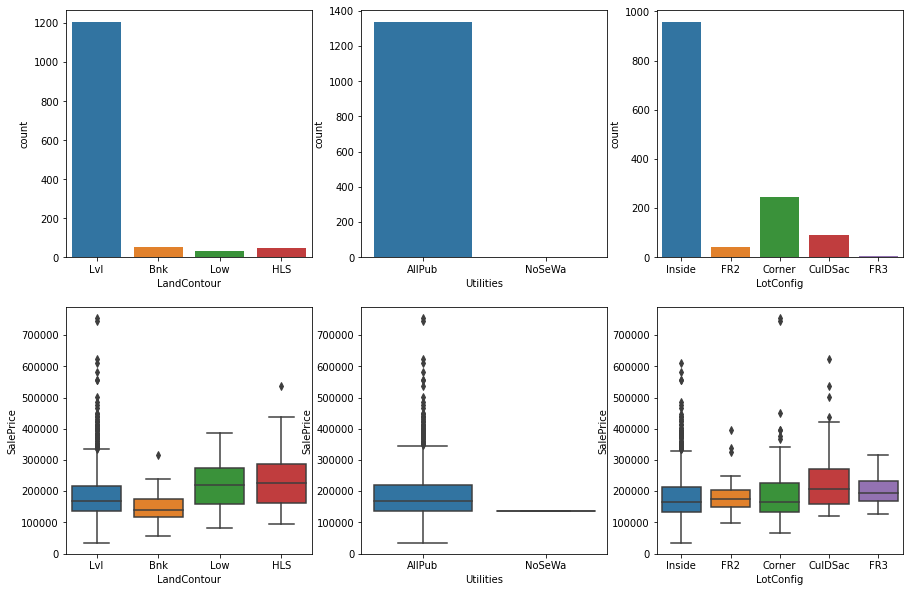

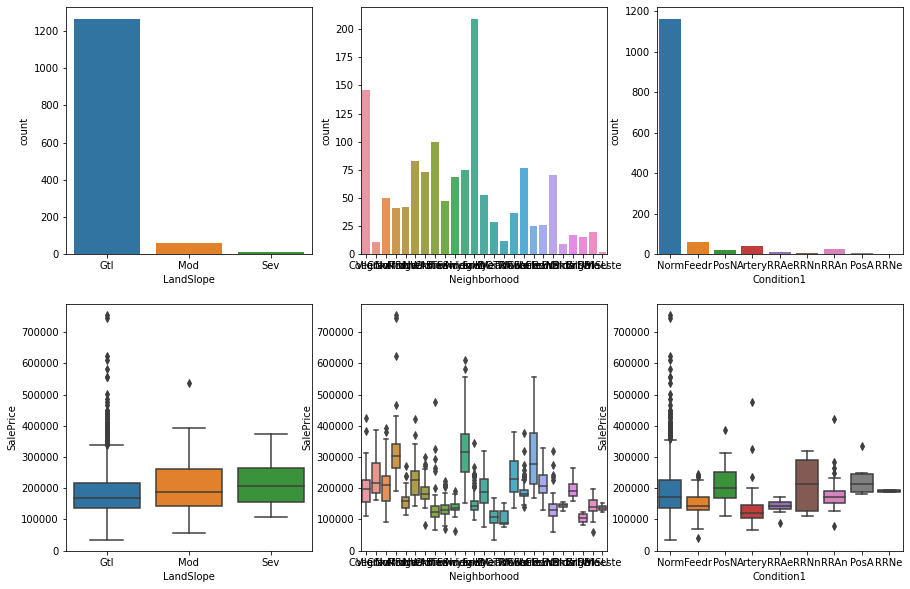

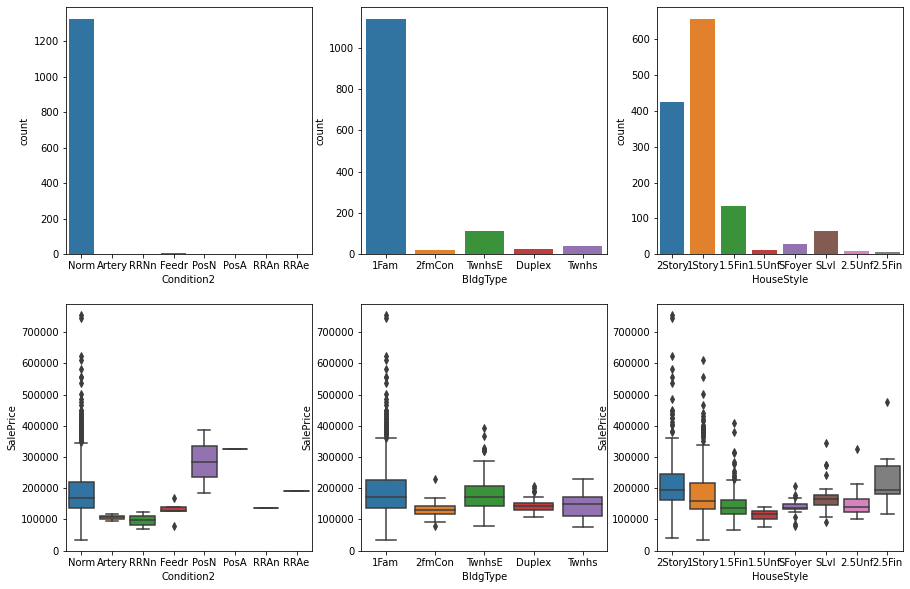

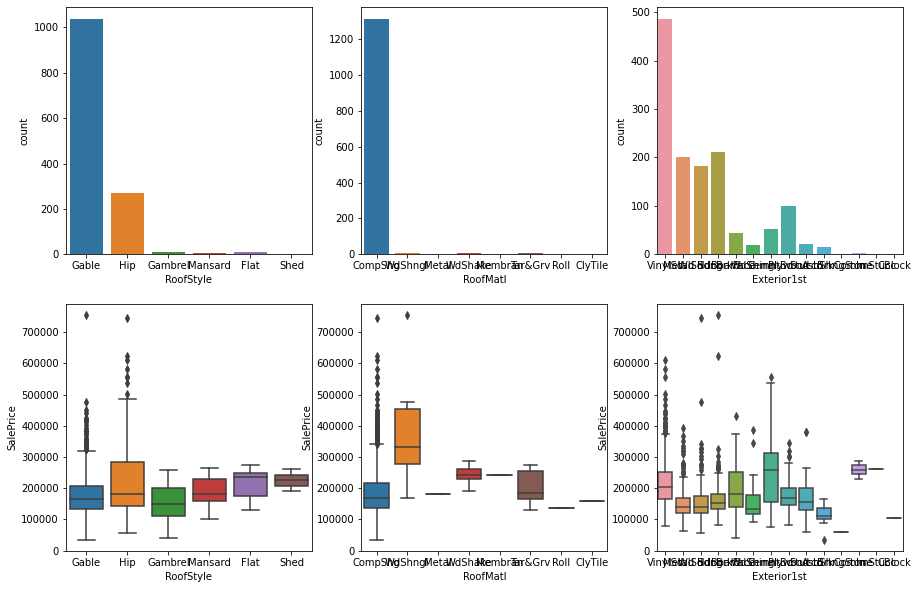

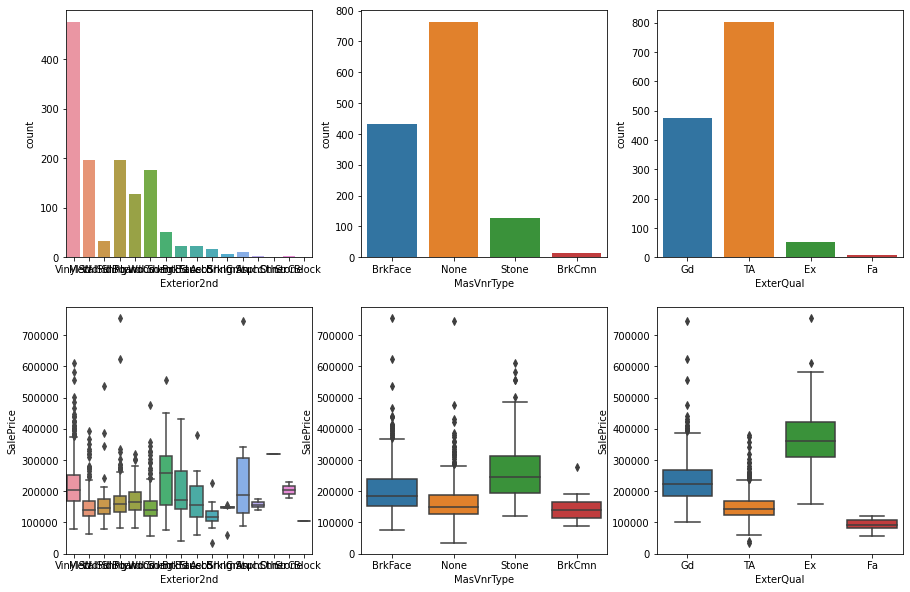

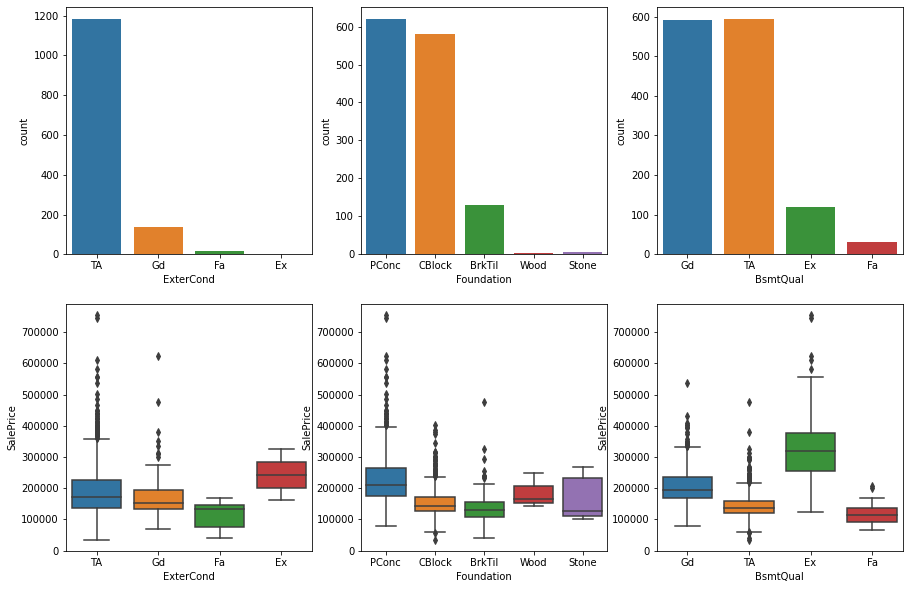

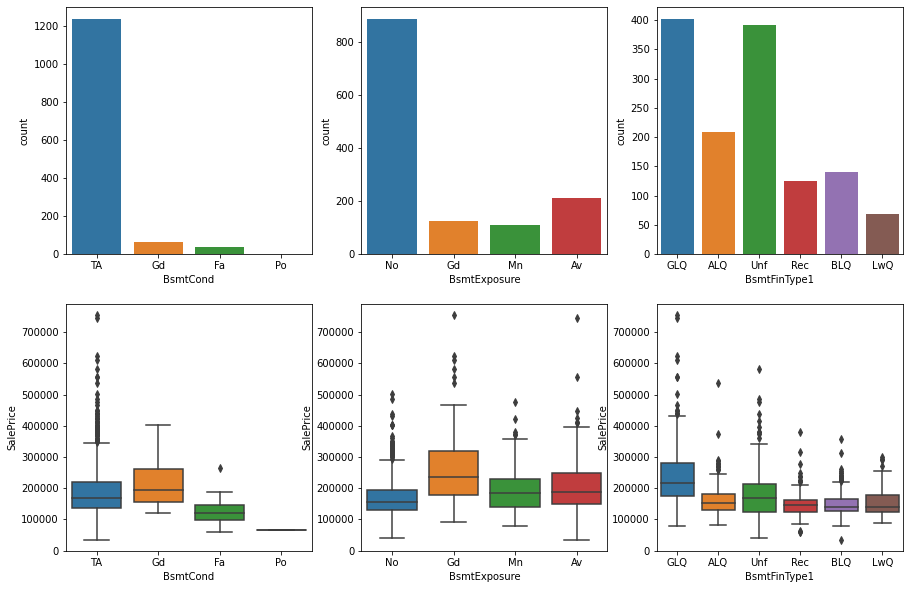

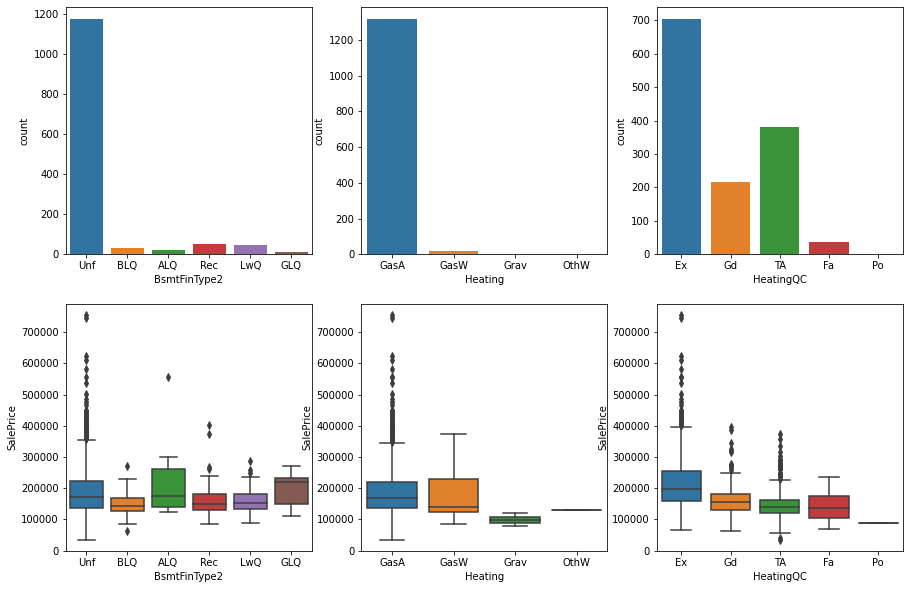

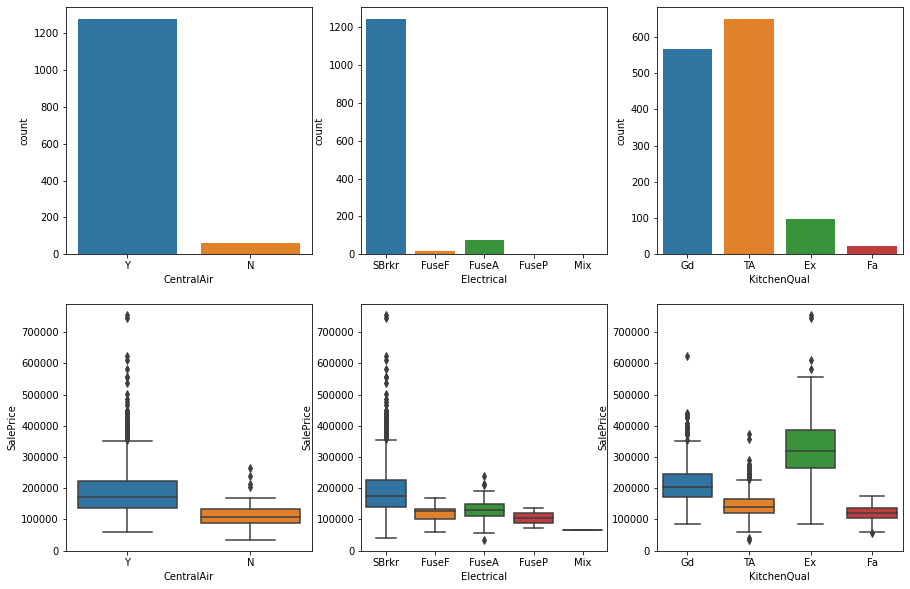

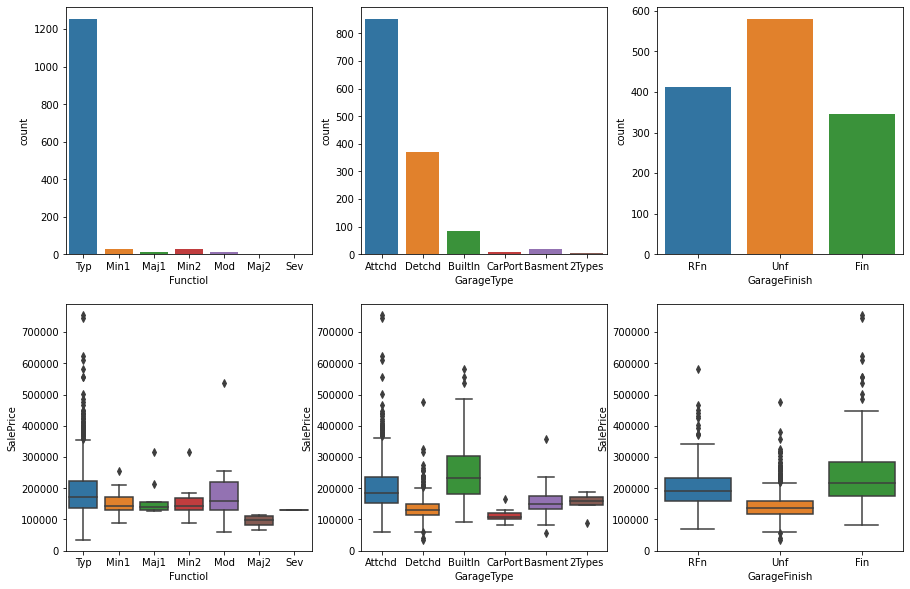

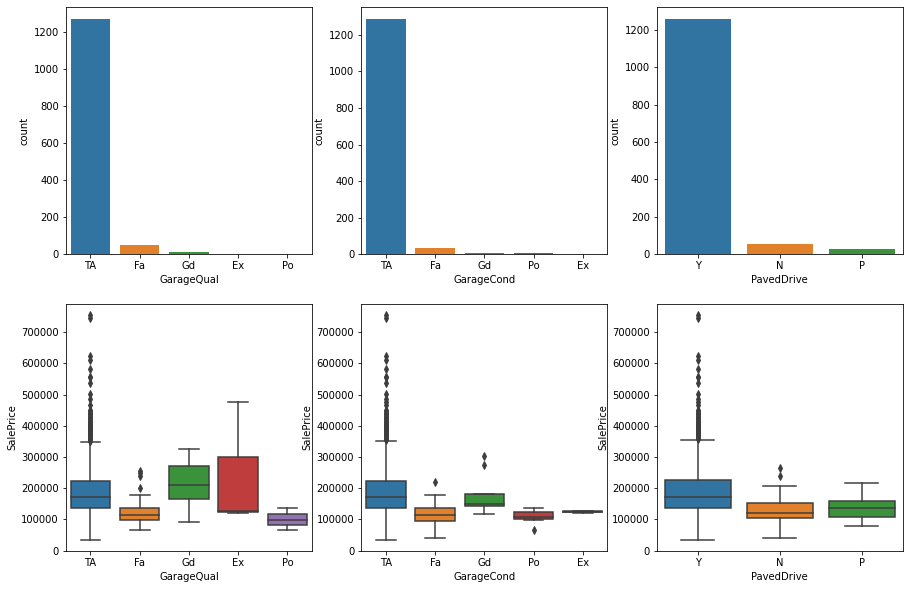

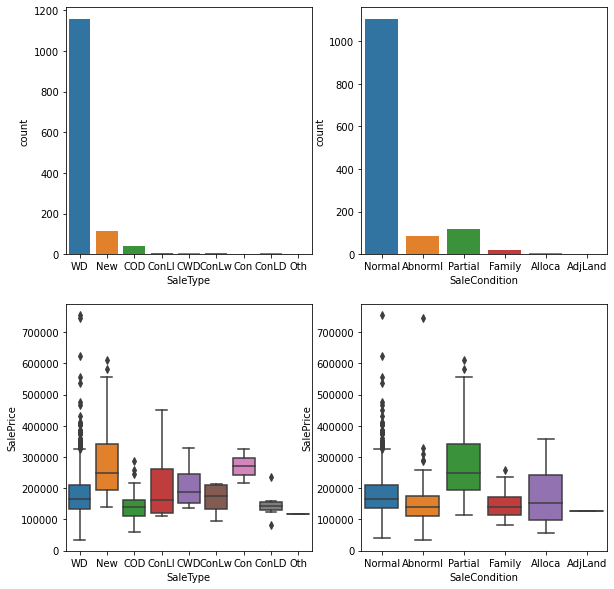

<Figure size 1080x720 with 0 Axes>

In [30]:
#Function to plot all independent categorical variables with SalePrice and count plot
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(category_df.columns):
    if ix <= 3:
        if c != 'SalePrice':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = category_df, x=c, ax = ax1) #For countplot
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=category_df, x=c, y='SalePrice', ax=ax2) #For boxplot
                        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [31]:
df.select_dtypes(include = 'object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [32]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1338 non-null   object
 1   Street         1338 non-null   object
 2   LotShape       1338 non-null   object
 3   LandContour    1338 non-null   object
 4   Utilities      1338 non-null   object
 5   LotConfig      1338 non-null   object
 6   LandSlope      1338 non-null   object
 7   Neighborhood   1338 non-null   object
 8   Condition1     1338 non-null   object
 9   Condition2     1338 non-null   object
 10  BldgType       1338 non-null   object
 11  HouseStyle     1338 non-null   object
 12  RoofStyle      1338 non-null   object
 13  RoofMatl       1338 non-null   object
 14  Exterior1st    1338 non-null   object
 15  Exterior2nd    1338 non-null   object
 16  MasVnrType     1338 non-null   object
 17  ExterQual      1338 non-null   object
 18  ExterCond      1338 non-null

In [33]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
class ChiSquare:
#Function to determine p-value and perform chi-square test
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi-square Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None

#Function to print the results of p-value and chi-square test     
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
        print(result)
#Function to determine chi-square and p-value less than or equal to 0.05
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


#Initializing ChiSquare Class
cT = ChiSquare(category_df)
#Perform Feature Selection
testColumns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiol', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition','SalePrice']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="SalePrice" ) 

MSZoning is IMPORTANT for Prediction
Street is IMPORTANT for Prediction
LotShape is IMPORTANT for Prediction
LandContour is NOT an important predictor. (Discard LandContour from model)
Utilities is NOT an important predictor. (Discard Utilities from model)
LotConfig is NOT an important predictor. (Discard LotConfig from model)
LandSlope is NOT an important predictor. (Discard LandSlope from model)
Neighborhood is IMPORTANT for Prediction
Condition1 is NOT an important predictor. (Discard Condition1 from model)
Condition2 is IMPORTANT for Prediction
BldgType is NOT an important predictor. (Discard BldgType from model)
HouseStyle is NOT an important predictor. (Discard HouseStyle from model)
RoofStyle is NOT an important predictor. (Discard RoofStyle from model)
RoofMatl is NOT an important predictor. (Discard RoofMatl from model)
Exterior1st is NOT an important predictor. (Discard Exterior1st from model)
Exterior2nd is NOT an important predictor. (Discard Exterior2nd from model)
MasVnrT

In [34]:
#Keep significant variables
category_df = category_df[['MSZoning','Street','LotShape','Neighborhood','Condition2','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','CentralAir','Electrical','KitchenQual','GarageType','GarageFinish','GarageQual','SaleType','SaleCondition','SalePrice']]

In [35]:
category_df.head(2)

,MSZoning,Street,LotShape,Neighborhood,Condition2,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,CentralAir,Electrical,KitchenQual,GarageType,GarageFinish,GarageQual,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,CollgCr,Norm,BrkFace,Gd,PConc,Gd,TA,No,Y,SBrkr,Gd,Attchd,RFn,TA,WD,Normal,208500
1,RL,Pave,Reg,Veenker,Norm,None,TA,CBlock,Gd,TA,Gd,Y,SBrkr,TA,Attchd,RFn,TA,WD,Normal,181500


In [36]:
number_df.head(2)

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,7,2003,856,1710,2,2,208500
1,6,1976,1262,1262,2,2,181500


In [37]:
#Combining the datasets
House = pd.merge(category_df, number_df, how="outer", on=["SalePrice"])

In [38]:
House.head(2)

,MSZoning,Street,LotShape,Neighborhood,Condition2,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,...,GarageQual,SaleType,SaleCondition,SalePrice,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars
0,RL,Pave,Reg,CollgCr,Norm,BrkFace,Gd,PConc,Gd,TA,...,TA,WD,Normal,208500,7,2003,856,1710,2,2
1,RL,Pave,Reg,Veenker,Norm,None,TA,CBlock,Gd,TA,...,TA,WD,Normal,181500,6,1976,1262,1262,2,2


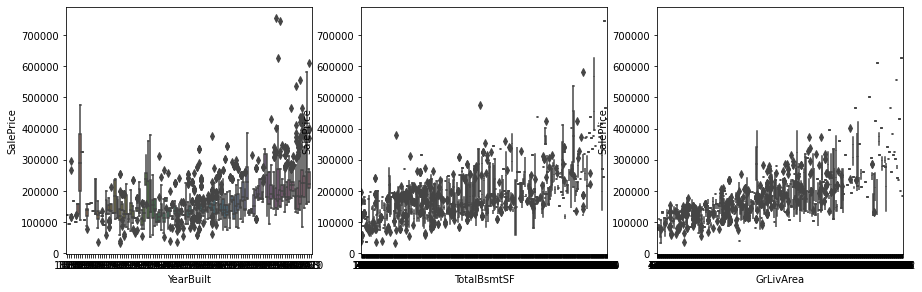

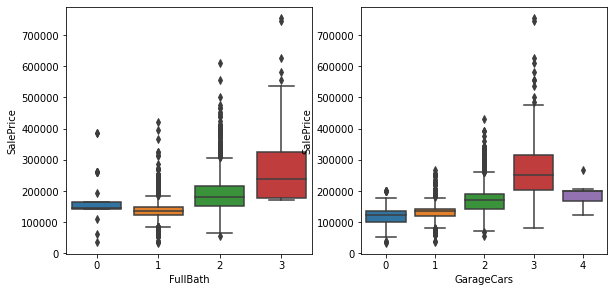

In [40]:
#Function to plot all independent categorical variables with SalePrice and count plot
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(House.columns):
    if ix <= 3:
        if c != 'SalePrice':
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=House, x=c, y='SalePrice', ax=ax2) #for boxplot
                        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1